In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [276]:
df=pd.read_csv("Total Male and female voters per districts.csv")

In [267]:
df.head()

,District,Male,Female,Third Gender,Total
0,Achham,60441,67299,2,127742
1,Arghakhanchi,60296,66403,0,126699
2,Baglung,73963,82839,0,156802
3,Baitadi,60227,64596,1,124824
4,Bajhang,47888,49721,1,97610


In [269]:
df.isna().sum()

District        0
Male            0
Female          0
Third Gender    0
Total           0
dtype: int64

In [270]:
df.sort_values(by=["Male"]).head()

,District,Male,Female,Third Gender,Total
24,Gulmi,0,94759,1,180775
44,Manang,2496,2599,0,5095
47,Mustang,4010,0,0,8263
21,Dolpa,8283,8420,0,16703
25,Humla,12696,11866,0,24562


In [271]:
df.sort_values(by=["Female"]).head()

,District,Male,Female,Third Gender,Total
47,Mustang,4010,0,0,8263
44,Manang,2496,2599,0,5095
21,Dolpa,8283,8420,0,16703
25,Humla,12696,11866,0,24562
46,Mugu,14375,13060,0,27435


In [272]:
df.describe()

,Male,Female,Third Gender
count,8.000000e+01,8.000000e+01,80.000000
mean,1.851372e+05,2.546872e+05,3.562500
std,7.849834e+05,8.991922e+05,16.160464
min,0.000000e+00,0.000000e+00,0.000000
25%,4.577675e+04,4.948575e+04,0.000000
50%,7.526500e+04,8.288850e+04,1.000000
75%,1.252198e+05,1.286485e+05,2.000000
max,7.069714e+06,6.984625e+06,143.000000


In [273]:
df[df.eq("Jajarkot").any(1)]

/tmp/ipykernel_8226/708290557.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df[df.eq("Jajarkot").any(1)]


,District,Male,Female,Third Gender,Total
27,Jajarkot,42410,36536,1,????
28,Jajarkot,42410,36536,1,????
29,Jajarkot,42410,36536,1,????


In [277]:
df=df.drop([27,28])

In [279]:
df[df.eq("Jajarkot").any(1)]

/tmp/ipykernel_8226/708290557.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df[df.eq("Jajarkot").any(1)]


,District,Male,Female,Third Gender,Total
29,Jajarkot,42410,36536,1,????


In [280]:
df.loc[29]=["Jajarkot",42410,36536,1,(42410+36536+1)]

In [281]:
df.loc[29]

District        Jajarkot
Male               42410
Female             36536
Third Gender           1
Total              78947
Name: 29, dtype: object

In [282]:
df.sort_values(by=["Female"]).head()

,District,Male,Female,Third Gender,Total
47,Mustang,4010,0,0,8263
44,Manang,2496,2599,0,5095
21,Dolpa,8283,8420,0,16703
25,Humla,12696,11866,0,24562
46,Mugu,14375,13060,0,27435


In [283]:
df.sort_values(by=["Male"]).head()

,District,Male,Female,Third Gender,Total
24,Gulmi,0,94759,1,180775
44,Manang,2496,2599,0,5095
47,Mustang,4010,0,0,8263
21,Dolpa,8283,8420,0,16703
25,Humla,12696,11866,0,24562


In [284]:
df.loc[24]=["Gulmi",(180775-94759-1),94759,1,180775]

In [285]:
df.sort_values(by=["Male"]).head()

,District,Male,Female,Third Gender,Total
44,Manang,2496,2599,0,5095
47,Mustang,4010,0,0,8263
21,Dolpa,8283,8420,0,16703
25,Humla,12696,11866,0,24562
59,Rasuwa,13965,13791,0,27756


In [286]:
df.sort_values(by=["Female"]).head()

,District,Male,Female,Third Gender,Total
47,Mustang,4010,0,0,8263
44,Manang,2496,2599,0,5095
21,Dolpa,8283,8420,0,16703
25,Humla,12696,11866,0,24562
46,Mugu,14375,13060,0,27435


In [287]:
df.loc[47]=["Mustang",4010,(8263-4010),0,8263]

In [288]:
df.loc[47]

District        Mustang
Male               4010
Female             4253
Third Gender          0
Total              8263
Name: 47, dtype: object

In [289]:
df['Total'] = pd.to_numeric(df['Total']) #Total was type object 

In [291]:
df.dtypes

District        object
Male             int64
Female           int64
Third Gender     int64
Total            int64
dtype: object

In [293]:
df.loc[df["Male"]+df["Female"]+df["Third Gender"]!=df["Total"]]

,District,Male,Female,Third Gender,Total
15,Tanahu,90144,3104327,0,194471
33,Kalikot,31668,293360,0,61028
49,Nawalparasi (East),682596,68584,1,131181
50,Nawalparasi (East),80316,89570,4,2212111
55,Parbat,47354,51889,0,99
75,Tanahu,90144,3104327,0,194471


In [294]:
df.loc[50]=["Nawalparasi (West)",80316,89570,4,(80316+89570+4)]

In [295]:
df.loc[49]=["Nawalparasi (East)",131181-1-68584,68584,1,131181]

In [296]:
df.loc[15]=["Tanahu",90144,194471-90144,0,194471]

In [297]:
df.loc[33]=["Kalikot",31668,61028-31668,0,61028]

In [298]:
df.loc[55]=["Parbat",47354,51889,0,47354+51889]

In [299]:
df.loc[df["Male"]+df["Female"]+df["Third Gender"]!=df["Total"]]

,District,Male,Female,Third Gender,Total
75,Tanahu,90144,3104327,0,194471


In [305]:
df=df.drop(75)

In [307]:
df.tail()

,District,Male,Female,Third Gender,Total
74,Syangja,89544,101708,1,191253
76,Taplejung,37187,33591,0,70778
77,Terhathum,30334,30370,0,60704
78,Udayapur,88510,86951,0,175461
79,Total,7069714,6984625,143,14054482


In [308]:
df=df.drop(79)

In [309]:
df.tail()

,District,Male,Female,Third Gender,Total
73,Surkhet,89268,95131,0,184399
74,Syangja,89544,101708,1,191253
76,Taplejung,37187,33591,0,70778
77,Terhathum,30334,30370,0,60704
78,Udayapur,88510,86951,0,175461


<AxesSubplot: xlabel='District'>

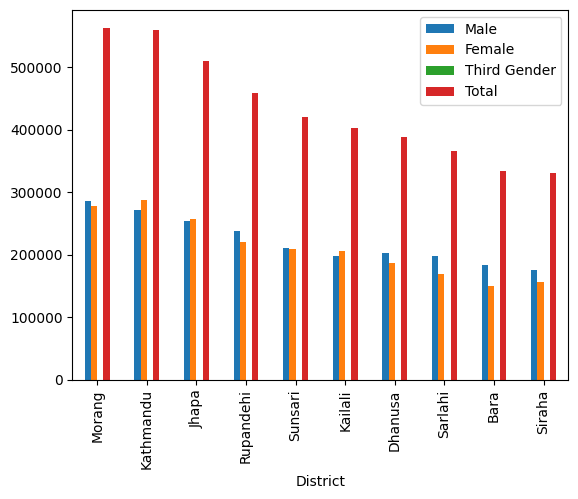

In [310]:
df.nlargest(10, 'Total').plot(kind='bar', x='District')


<AxesSubplot: xlabel='District'>

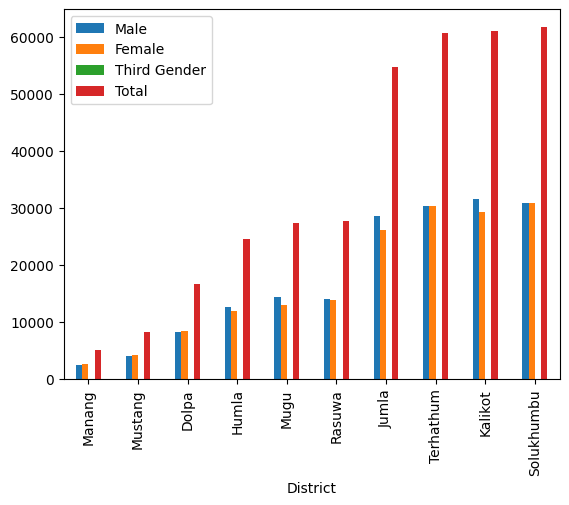

In [311]:
df.nsmallest(10, 'Total').plot(kind='bar', x='District')


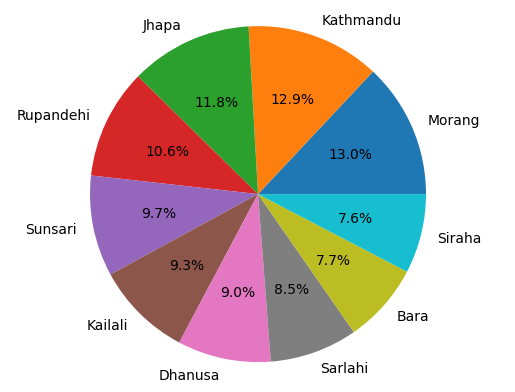

In [312]:
nlrg=df.nlargest(10,'Total')
plt.pie(x=nlrg['Total'],labels=nlrg['District'],autopct='%1.1f%%')
plt.axis('equal')
plt.show()

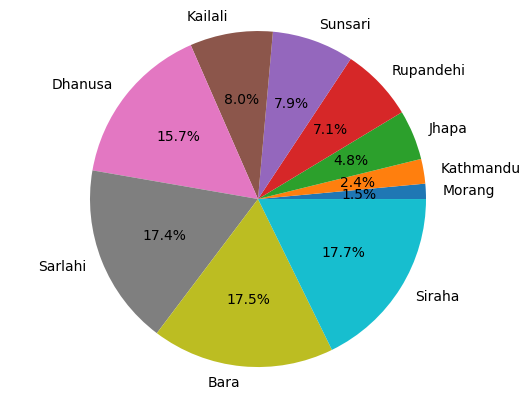

In [314]:
nsmall=df.nsmallest(10,'Total')
plt.pie(x=nsmall['Total'],labels=nlrg['District'],autopct='%1.1f%%')
plt.axis('equal')
plt.show()

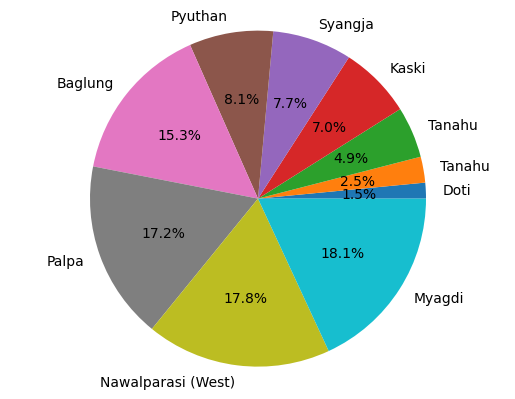

In [313]:
nslmallf=df.nsmallest(10,'Female')
plt.pie(x=nslmallf['Female'],labels=nslammf['District'],autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [315]:
df["MaleIsToFemale"]=df["Male"]/df["Female"]

In [317]:
df.head()

,District,Male,Female,Third Gender,Total,MaleIsToFemale
0,Achham,60441,67299,2,127742,0.898097
1,Arghakhanchi,60296,66403,0,126699,0.908031
2,Baglung,73963,82839,0,156802,0.892852
3,Baitadi,60227,64596,1,124824,0.932364
4,Bajhang,47888,49721,1,97610,0.963134


In [318]:
df.sort_values(by=["MaleIsToFemale"]).tail()

,District,Male,Female,Third Gender,Total,MaleIsToFemale
67,Sarlahi,198066,168534,5,366605,1.175229
60,Rautahat,176498,146952,0,323450,1.201059
35,Kapilbastu,156606,129940,2,286548,1.205218
7,Bara,183784,149884,10,333678,1.226175
56,Parsa,159286,120910,15,280211,1.317393


In [319]:
df.sort_values(by=["MaleIsToFemale"]).head()

,District,Male,Female,Third Gender,Total,MaleIsToFemale
22,Doti,46098,54789,0,100887,0.841373
15,Tanahu,90144,104327,0,194471,0.864052
36,Kaski,104576,120230,5,224811,0.869800
74,Syangja,89544,101708,1,191253,0.880403
57,Pyuthan,60036,67410,1,127447,0.890610
